### Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer()

In [ ]:
import numpy as np
import pandas as pd
df_processed = pd.read_csv("/content/drive/MyDrive/df_merged2.csv")

import re
def reprocess(text):
    return re.sub(r'[^\s\d\w]','',text).split(' ')
df_processed['title_new'] = df_processed['title_new'].apply(reprocess)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y=df_processed['views']
y = ohe.fit(Y[:,0].reshape(-1,1)).toarray
y

KeyError: ignored

In [ ]:
n1 = df_processed['views'].describe()['25%']
n2 = df_processed['views'].describe()['50%']
n3 = df_processed['views'].describe()['75%']

In [ ]:
### preprocess views-levels
def ViewPreproc2(data):
    if data <= n1:
        label = 0
    elif n1 < data <= n2:
        label = 1
    elif n2 < data <= n3:
        label = 2
    elif data > n3:
        label = 3
    return label

df_viewlv = []
for view in df_processed['views']:
    label = ViewPreproc2(view)
    df_viewlv.append(label)
df_processed['view_lv'] = df_viewlv

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_processed['emoji_label'] = le.fit_transform(df_processed['emoji'])

In [ ]:
display(df_processed)

,label,title_new,emoji,views,subs,channel_name,view_lv,emoji_label
0,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,3,1
1,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,2,0
2,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,1,0
3,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,3,0
4,0,"[달걀, 힐링, 타임즈, EP, ASMR, Oddly, Satisfying, Cos...",False,423584.0,1040000.0,뷰티포인트 Beauty Point,3,0
...,...,...,...,...,...,...,...,...
11461,4,"[아줌마, 브이, 로그, 주부, 일상, 네일아트, vlog, Housewife, s...",False,93572.0,102000.0,양아치TV AUNT TV,2,0
11462,4,"[미국, 유학생, 일상, 브이, 로그, 학교, 브이, 로그, 코딩, 수업, 학교, ...",False,1208.0,522.0,예슬 Serena,1,0
11463,4,"[미국, 유학생, 일상, 브이, 로그, 주말, 브이, 로그, 요리, 해먹, 마트, ...",False,950.0,522.0,예슬 Serena,1,0
11464,4,"[I, MADE, A, TINY, HOUSE, USING, BUILDING, HAC...",False,162171.0,1070000.0,Tesla US,3,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

### make data to list of strings again
title_filtered = []
for title in df_processed['title_new']:
    title_str =' '.join(title)
    title_filtered.append(title_str) # list of docs, doc 은 단어들로 구성이 된 string data
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환
df_processed['title_str']=title_filtered
display(df_processed)

,label,title_new,emoji,views,subs,channel_name,view_lv,emoji_label,title_str
0,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,3,1,할인 뷰마 박스 공개
1,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,2,0,요즘 프로필 메이크업 연예인 프로필 메이크업 역대 메이크업
2,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,1,0,배우 잠적 이유 뷰티 사이드 요약
3,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,3,0,청담동 메이크업 추천 그대로 구매 지속 파운데이션 가닥 속눈썹 고급 하이 라이터 웨...
4,0,"[달걀, 힐링, 타임즈, EP, ASMR, Oddly, Satisfying, Cos...",False,423584.0,1040000.0,뷰티포인트 Beauty Point,3,0,달걀 힐링 타임즈 EP ASMR Oddly Satisfying Cosmetic De...
...,...,...,...,...,...,...,...,...,...
11461,4,"[아줌마, 브이, 로그, 주부, 일상, 네일아트, vlog, Housewife, s...",False,93572.0,102000.0,양아치TV AUNT TV,2,0,아줌마 브이 로그 주부 일상 네일아트 vlog Housewife s daily ro...
11462,4,"[미국, 유학생, 일상, 브이, 로그, 학교, 브이, 로그, 코딩, 수업, 학교, ...",False,1208.0,522.0,예슬 Serena,1,0,미국 유학생 일상 브이 로그 학교 브이 로그 코딩 수업 학교 스킨 케어 vlog to
11463,4,"[미국, 유학생, 일상, 브이, 로그, 주말, 브이, 로그, 요리, 해먹, 마트, ...",False,950.0,522.0,예슬 Serena,1,0,미국 유학생 일상 브이 로그 주말 브이 로그 요리 해먹 마트 일상 마스크 마트 중국...
11464,4,"[I, MADE, A, TINY, HOUSE, USING, BUILDING, HAC...",False,162171.0,1070000.0,Tesla US,3,0,I MADE A TINY HOUSE USING BUILDING HACKS ON BL...


### Vectorization ver 1.

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features = 1500)
tfidf_features2 = tfidf_vectorizer2.fit_transform(df_processed['title_str'])
tfidf_features2 = np.array(tfidf_features2.todense())
tfidf_features2.shape

(11466, 1500)

In [ ]:
tfidf2 = pd.DataFrame(tfidf_features2)
X = pd.concat([tfidf2, df_processed[['subs','emoji_label']]], axis = 1)
y = df_processed['view_lv']

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()

X_sc = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn import preprocessing
X_norm = preprocessing.normalize(X_sc, norm = 'l2')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1000)
X_r = pca.fit_transform(X_sc)
print('Explained variance ratio (first two components): ', pca.explained_variance_ratio_)

Explained variance ratio (first two components):  [0.00946402 0.00571054 0.00532332 0.00453055 0.00429327 0.00362676
 0.0033119  0.00316666 0.00308885 0.00295604 0.00288373 0.00275156
 0.00273857 0.0027259  0.00271024 0.00264372 0.0026158  0.00260652
 0.0025323  0.00247555 0.0024237  0.0023349  0.00231406 0.00227861
 0.00224248 0.00220672 0.00218153 0.00212925 0.00208436 0.00205633
 0.00204384 0.00202684 0.00199784 0.0019726  0.00196045 0.00193669
 0.00192423 0.00189246 0.00186512 0.00184553 0.00180235 0.00179369
 0.00177968 0.00175811 0.00174667 0.00174269 0.00173702 0.00170998
 0.00169883 0.0016953  0.00168329 0.00167101 0.0016633  0.00165622
 0.00164185 0.00163494 0.0016295  0.00161845 0.00160987 0.00160357
 0.00159454 0.00158122 0.0015751  0.00157117 0.00155997 0.00154639
 0.00153659 0.00153291 0.00152545 0.00151522 0.00151403 0.00150825
 0.0015     0.00149415 0.00147885 0.0014756  0.00146717 0.0014645
 0.00145901 0.00145695 0.00145014 0.00144435 0.00144379 0.00143516
 0.00143272 0

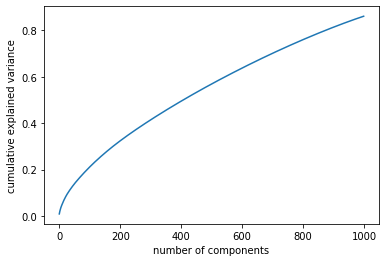

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
X_sc

array([[-0.03903136, -0.03968757, -0.03617126, ..., -0.04857298,
        -0.0183323 ,  2.30142138],
       [-0.03903136, -0.03968757, -0.03617126, ..., -0.04857298,
        -0.19464033, -0.43451408],
       [-0.03903136, -0.03968757, -0.03617126, ..., -0.04857298,
        -0.11151064, -0.43451408],
       ...,
       [-0.03903136, -0.03968757, -0.03617126, ..., -0.04857298,
        -0.33941207, -0.43451408],
       [-0.03903136, -0.03968757, -0.03617126, ..., -0.04857298,
         0.63757014, -0.43451408],
       [-0.03903136, -0.03968757, -0.03617126, ..., -0.04857298,
        -0.33941207, -0.43451408]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_gnb)

0.4302528334786399

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_lr1 = lr1.predict(X_test)

accuracy_score(y_test, y_lr1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.576369414843896

In [ ]:
39.41 * 71

2798.1099999999997

In [ ]:
lr3 = LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio = 0.3, C=0.1, n_jobs=-1)
lr3.fit(X_train, y_train)
y_lr3 = lr3.predict(X_test)

accuracy_score(y_test, y_lr3)
r2_score(y_test, y_lr3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.3638640296708161

In [ ]:
print(accuracy_score(y_test, y_lr3)
,r2_score(y_test, y_lr3))

0.5726303982052721 0.3638640296708161


logistic에서는 std scaling이 더 좋은 퍼포를 보임 역시나

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
accuracy_score(y_test, y_knn)

0.5533744625163582

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)
accuracy_score(y_test, y_dt)

0.6941484389605533

In [ ]:
from sklearn.svm import SVC
svc1 = SVC(kernel='rbf', gamma='auto', C=0.1)
svc1.fit(X_train, y_train)
y_svc1 = svc1.predict(X_test)
accuracy_score(y_test, y_svc1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_dt = BaggingClassifier(KNeighborsClassifier(), n_estimators=1000,
                           max_samples=100, bootstrap=True, n_jobs=-1)
bag_dt.fit(X_train, y_train)
y_bag_dt = bag_dt.predict(X_test)
accuracy_score(y_test, y_bag_dt)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.30772106935875865

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=50, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_rnd = rnd_clf.predict(X_test)
accuracy_score(y_test, y_rnd)

0.6233653007846556

In [ ]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf2.fit(X_train, y_train)
y_rnd2 = rnd_clf2.predict(X_test)
accuracy_score(y_test, y_rnd2)

0.7264909328846514

In [ ]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_norm, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf5 = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf5.fit(X_train4, y_train4)
y_rnd5 = rnd_clf5.predict(X_test4)

In [ ]:
from sklearn.metrics import accuracy_score, r2_score

print(accuracy_score(y_rnd5, y_test4),
r2_score(y_rnd5, y_test4))

0.6507758459525145 0.5423722500969566


In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(X_train4, y_train4)
y_lr2 = lr2.predict(X_test4)

accuracy_score(y_test4, y_lr2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5516919050289774

In [ ]:
rnd_clf4 = RandomForestClassifier(n_estimators=1000, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf4.fit(X_train, y_train)
y_rnd4 = rnd_clf4.predict(X_test)
accuracy_score(y_test, y_rnd4)

0.7221910637502337

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=50,
                                 max_features='sqrt', max_depth = None,
                                 n_jobs=-1)
ext_clf.fit(X_train, y_train)
y_ext = ext_clf.predict(X_test)
accuracy_score(y_test, y_ext)

0.7023742755655262

### Vectorization ver2.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features = 1000)
tfidf_features = tfidf_vectorizer.fit_transform(df_processed['title_str'])
tfidf_features = np.array(tfidf_features.todense())
tfidf_features.shape

(26742, 1000)

In [ ]:
tfidf = pd.DataFrame(tfidf_features)
X2 = pd.concat([tfidf, df_processed[['subs','emoji_label']]], axis = 1)
y = df_processed['view_lv']

In [ ]:
X_sc2 = scaler.fit_transform(X2)

from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()
X_sc3 = max_scaler.fit_transform(X2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X_sc3

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00512821e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.80512821e-02, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.15384615e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.67692308e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.48717949e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.67692308e-05, 0.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sc2, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sc3, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)
y_gnb2 = gnb2.predict(X_test2)
accuracy_score(y_test2, y_gnb2)

0.4524210132735091

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)
y_lr2 = lr2.predict(X_test2)

accuracy_score(y_test2, y_lr2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5737521031968592

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier()
dt2.fit(X_train2, y_train2)
y_dt2 = dt2.predict(X_test2)
accuracy_score(y_test2, y_dt2)

0.6866704056833053

In [ ]:
dt3 = DecisionTreeClassifier()
dt3.fit(X_train3, y_train3)
y_dt3 = dt3.predict(X_test3)
accuracy_score(y_test3, y_dt3)

0.6879790615068238

In [ ]:
rnd_clf3 = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf3.fit(X_train3, y_train3)
y_rnd3 = rnd_clf3.predict(X_test3)
accuracy_score(y_test3, y_rnd3)

0.7210693587586465

부스팅으로 재도전 // 데이터 압축 시도 // 로지스틱 + ensemble 도전

### 0526 깨달음
- scaling : max
- sparse matrix compression 더 연구, 1500 이 500 보다는 나은것같음
- decision tree 가 성능이 젤 나음 //로지스틱은 너무 연산량이 많은가봄.. 페널티 텀이랑 이런거 넣어서 튜닝 필요

In [ ]:
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression(penalty='l1')
lr3.fit(X_train3, y_train3)
y_lr3 = lr3.predict(X_test3)

accuracy_score(y_test3, y_lr3)